In [ ]:
!pip install pyscipopt

In [ ]:
import numpy as np
from pyscipopt import Model, quicksum
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Factors and their levels
| Factor | Symbol | Low(-1) | Mid (0) | High (+1) |
|:---:|:---:|:---:|:---:|:---:|
| Die temperature ($^{\circ}$C) | $x_{1}$ | 80 | 100| 120 |
| Moisture content (%) | $x_{2}$ | 10 | 15 | 20 |


## Central composite design (CCD) with responses
| Run | $x_{1}$ | $x_{2}$ | Response (PDI) |
|:---:|:---:|:---:|:---:|
| 1 | -1 | -1 | 85 |
| 2 | +1 | -1 | 87 |
| 3 | -1 | +1 | 80 |
| 4 | +1 | +1 | 84 |
| 5 | 0 | 0 | 87 |

In [ ]:
# Create the quadratic RSM from the DoE table.
x1 = np.array([-1, 1, -1, 1, 0])
x2 = np.array([-1, -1, 1, 1, 0])
y = np.array([85, 87, 80, 84, 87])
X = np.array([np.ones(np.shape(x1)),
              x1,
              x2,
              x1**2,
              x2**2,
              x1*x2]).T
u = np.linalg.lstsq(X.T@X,X.T@y)[0]
q = lambda x1,x2: u[0] + u[1]*x1 + u[2]*x2 + u[3]*x1**2 + u[4]*x2**2 + u[5]*x1*x2

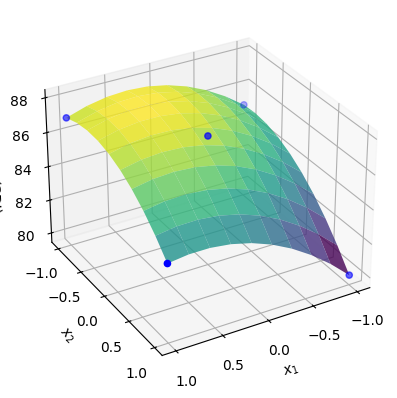

In [ ]:
# Illustrate the RSM.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1_surf, x2_surf = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
q_surf = q(x1_surf, x2_surf)
ax.plot_surface(x1_surf, x2_surf, q_surf, cmap='viridis', alpha=0.8)

ax.scatter(x1, x2, y, c='b', marker='o')

ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('Response (PDI)')

ax.view_init(30, 60, 0)

plt.show()

In [ ]:
# Maximize the PDI.

m = Model()
x = [m.addVar(vtype='I', lb=-1, ub=1, name=f"x{i}") for i in range(2)]
obj = m.addVar(vtype='C', name="obj")
m.setObjective(obj, sense='maximize')
m.addCons(obj <= u[0] + u[1]*x[0] + u[2]*x[1] + u[3]*x[0]**2 + u[4]*x[1]**2 + u[5]*x[0]*x[1])
m.optimize()

In [ ]:
# Get the solution

SOL= m.getBestSol()
x_opt = [SOL[x[0]], SOL[x[1]]]
pdi_opt = m.getObjVal()
print(f"Max PDI: {pdi_opt}\nObtained at: x1={x_opt[0]} x2={x_opt[1]}")

Max PDI: 87.49999999999994
Obtained at: x1=-3.145641718742494e-13 x2=-1.0


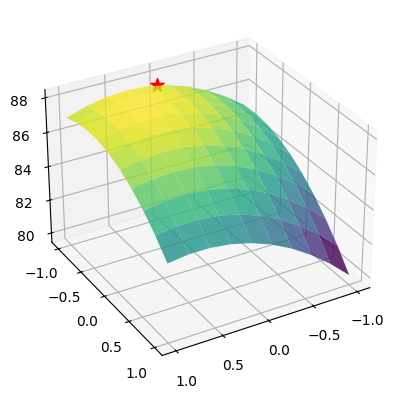

In [ ]:
# Illustrate the solution

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1_surf, x2_surf = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
q_surf = q(x1_surf, x2_surf)
ax.plot_surface(x1_surf, x2_surf, q_surf, cmap='viridis', alpha=0.8)

ax.scatter(x_opt[0], x_opt[1], pdi_opt, c='r', s=100, marker='*')

ax.view_init(30, 60, 0)

plt.show()

----